In [1]:
import anndata
import pandas as pd
import scvi

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('gutenberg_sentences.h5ad')

In [3]:
scvi.data.setup_anndata(adata)

INFO      No batch_key inputted, assuming all cells are same batch                           
INFO      No label_key inputted, assuming all cells have same label                          
INFO      Using data from adata.X                                                            
INFO      Computing library size prior per batch                                             
INFO      Successfully registered anndata object containing 36952 cells, 51251 vars, 1       
          batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates  
          and 0 extra continuous covariates.                                                 
INFO      Please do not further modify adata until model is trained.                         


In [10]:
model = scvi.model.SCVI(adata, gene_likelihood='nb', )

In [11]:
model.train(n_epochs = 10, n_iter_kl_warmup = 100, n_epochs_kl_warmup = None)

INFO      Training for 10 epochs                                                             
INFO      KL warmup for 100 iterations                                                       
Training...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:31<00:00, 15.11s/it]
INFO      Training time:  151 s. / 10 epochs                                                 


In [12]:
model.history

defaultdict(list, {})

In [14]:
latent = model.get_latent_representation()

In [15]:
from openTSNE import TSNE

In [16]:
tsne = TSNE(verbose = True)

In [17]:
yy = tsne.fit(latent)

C:\Users\vale\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


--------------------------------------------------------------------------------
TSNE(callbacks=None, callbacks_every_iters=50, dof=1, early_exaggeration=12,
     early_exaggeration_iter=250, exaggeration=None, final_momentum=0.8,
     initial_momentum=0.5, initialization='pca', ints_in_interval=1,
     learning_rate='auto', max_grad_norm=None, metric='euclidean',
     metric_params=None, min_num_intervals=50, n_components=2,
     n_interpolation_points=3, n_iter=500, n_jobs=1,
     negative_gradient_method='fft', neighbors=None, perplexity=30,
     random_state=None, theta=0.5, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.85 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.54 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.07 seconds
===> Running optimization with exaggeratio

In [18]:
for i, y in enumerate(yy.T):
    adata.obs[f'tsne_{i + 1}'] = y

In [19]:
import plotnine as p

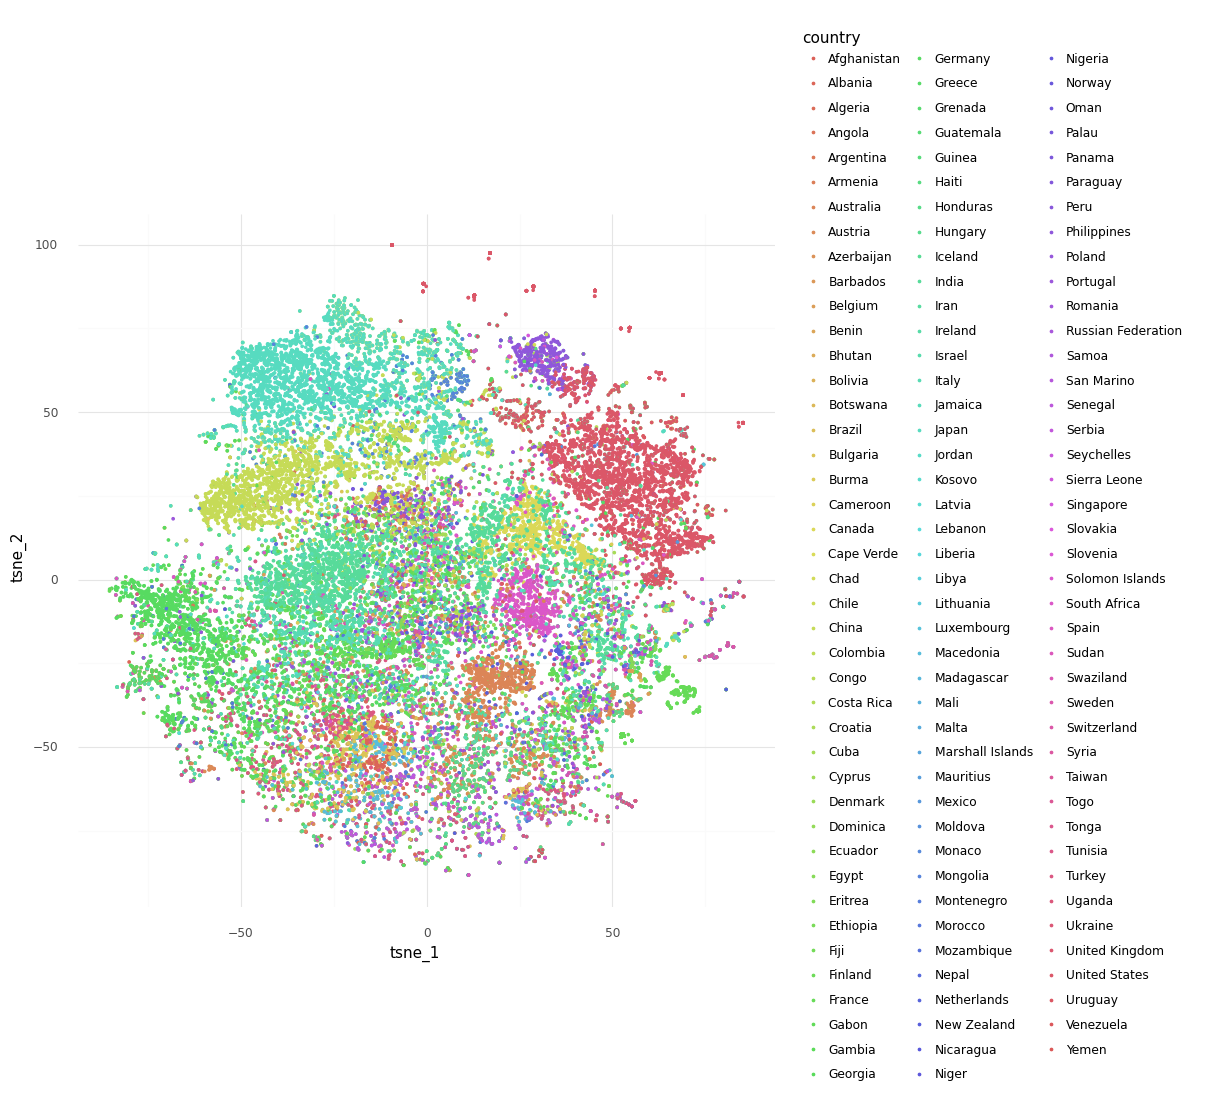

<ggplot: (-9223371909422180528)>

In [33]:
p.options.figure_size = 9, 9
(
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', label = 'country', color = 'country'), adata.obs)
    + p.geom_point(shape = '.')
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(ncol = 3))
)

In [36]:
ldf = pd.DataFrame(latent, index = adata.obs.index)
ldf['country'] = adata.obs['country']

In [38]:
country_means = ldf.groupby('country').mean()

In [40]:
from scipy.cluster import hierarchy

In [41]:
linkage = hierarchy.linkage(country_means, method='average')

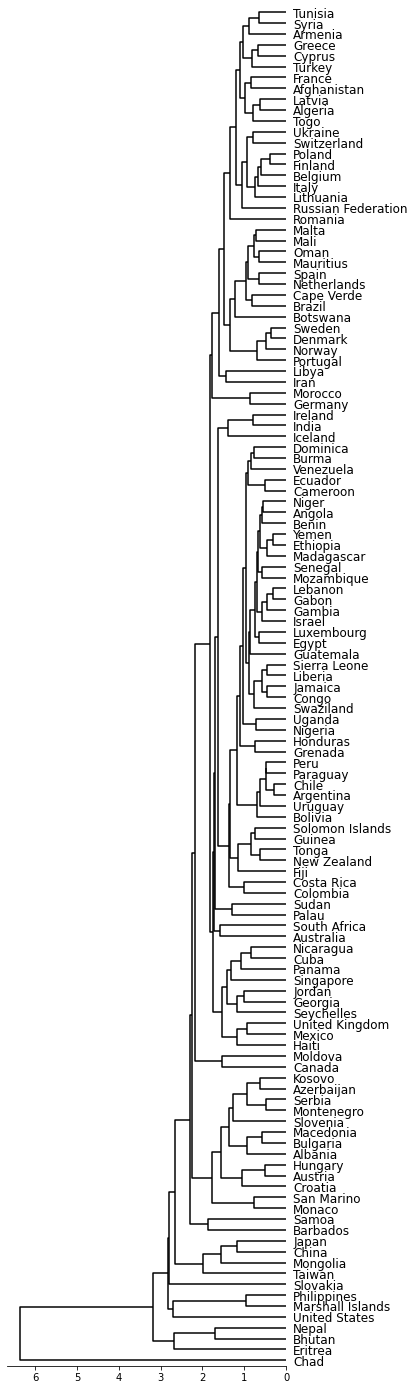

In [46]:
figsize(5, 25)
hierarchy.dendrogram(
    linkage,
    color_threshold=0,
    orientation='left',
    labels=country_means.index,
    above_threshold_color='k'
);

plt.yticks(fontsize=12);

ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [49]:
idx1 = (adata.obs['country'] == 'Brazil').pipe(np.array)
idx2 = (adata.obs['country'] != 'Brazil').pipe(np.array)

In [50]:
enr_results = model.differential_expression(idx1 = idx1, idx2 = idx2)

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:40<00:00, 40.86s/it]


In [53]:
enr_results.sort_values('lfc_mean', ascending = False).head(25)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
Paraguay,0.9610,0.0390,3.204413,0.000202,0.000063,2.241198,2.353093,3.912137,-12.253965,17.540230,0.077381,0.004921,0.077381,0.004921,9.276850,0.589592,True
Para,0.9556,0.0444,3.069100,0.000216,0.000069,2.125193,2.217412,3.565483,-10.700912,18.851820,0.089286,0.005763,0.089286,0.005763,10.523558,0.658595,True
Chile,0.9590,0.0410,3.152319,0.000340,0.000115,2.054208,2.215172,3.950824,-13.204000,18.760864,0.035714,0.009896,0.035714,0.009896,3.686405,1.150460,True
Peru,0.9424,0.0576,2.794907,0.000158,0.000059,1.839448,1.956261,3.033332,-11.123078,10.963799,0.047619,0.006008,0.047619,0.006008,3.987997,0.651213,False
Paraguaya,0.9484,0.0516,2.911254,0.000052,0.000020,1.801927,1.946238,3.221451,-11.412367,11.989263,0.023810,0.001550,0.023810,0.001550,3.771054,0.181199,True
Wds,0.9604,0.0396,3.188521,0.000045,0.000042,1.790489,2.057772,5.267997,-27.506092,30.739227,0.000000,0.002093,0.000000,0.002093,0.000000,0.892776,True
HA,0.9522,0.0478,2.991749,0.000106,0.000042,1.773762,1.902935,4.218817,-18.391264,16.517157,0.011905,0.005736,0.011905,0.005736,0.768787,0.443163,True
Argentina,0.9514,0.0486,2.974311,0.000187,0.000069,1.768646,1.922850,3.513970,-13.841768,13.806028,0.035714,0.006361,0.035714,0.006361,2.887867,0.727220,True
Paraguayan,0.9438,0.0562,2.820997,0.000048,0.000019,1.757416,1.837177,3.090287,-9.604884,10.837910,0.023810,0.001495,0.023810,0.001495,3.771054,0.171532,True
CHAPTER,0.9548,0.0452,3.050405,0.000095,0.000037,1.753265,1.860656,4.209851,-19.322140,16.868160,0.011905,0.004622,0.011905,0.004622,0.768787,0.362987,True


In [54]:
enr_results.sort_values('lfc_mean', ascending = False).tail(25)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
proposal,0.9180,0.0820,2.415478,0.000015,0.000030,-1.023015,-0.882343,2.918095,-21.527935,20.106009,0.000000,0.004486,0.000000,0.004486,0.000000,0.329676,False
interest,0.9086,0.0914,2.296659,0.000105,0.000229,-1.027062,-0.990294,2.264598,-12.735035,8.231360,0.011905,0.031345,0.011905,0.031345,0.533603,2.422902,False
Your,0.9300,0.0700,2.586689,0.000005,0.000010,-1.029825,-0.923178,3.149805,-21.569469,22.826818,0.000000,0.001468,0.000000,0.001468,0.000000,0.095397,False
avowed,0.9300,0.0700,2.586689,0.000007,0.000012,-1.044767,-0.700739,3.976223,-31.561247,22.894911,0.000000,0.001604,0.000000,0.001604,0.000000,0.101653,False
powers,0.9186,0.0814,2.423475,0.000057,0.000112,-1.052865,-0.957534,2.471299,-18.842262,7.316980,0.005952,0.012696,0.005952,0.012696,0.661376,0.904258,False
governments,0.9288,0.0712,2.568400,0.000013,0.000027,-1.056241,-0.901912,3.199273,-23.551846,19.389633,0.000000,0.003616,0.000000,0.003616,0.000000,0.244782,False
measures,0.9216,0.0784,2.464287,0.000019,0.000039,-1.059959,-0.996339,2.774965,-19.479401,17.128368,0.000000,0.005301,0.000000,0.005301,0.000000,0.348565,False
Majesty,0.9384,0.0616,2.723514,0.000013,0.000030,-1.072543,-0.892133,3.675216,-24.726978,27.172838,0.005952,0.004649,0.005952,0.004649,0.589345,0.275877,False
formal,0.9238,0.0762,2.495134,0.000023,0.000041,-1.089039,-0.921546,3.240876,-25.501719,20.512318,0.005952,0.005437,0.005952,0.005437,0.601251,0.397394,False
affairs,0.9332,0.0668,2.636916,0.000035,0.000082,-1.096119,-1.158961,2.268822,-7.838360,8.210595,0.000000,0.010956,0.000000,0.010956,0.000000,0.805546,False


In [59]:
adata.obs['country'] = adata.obs['country'].pipe(np.array)

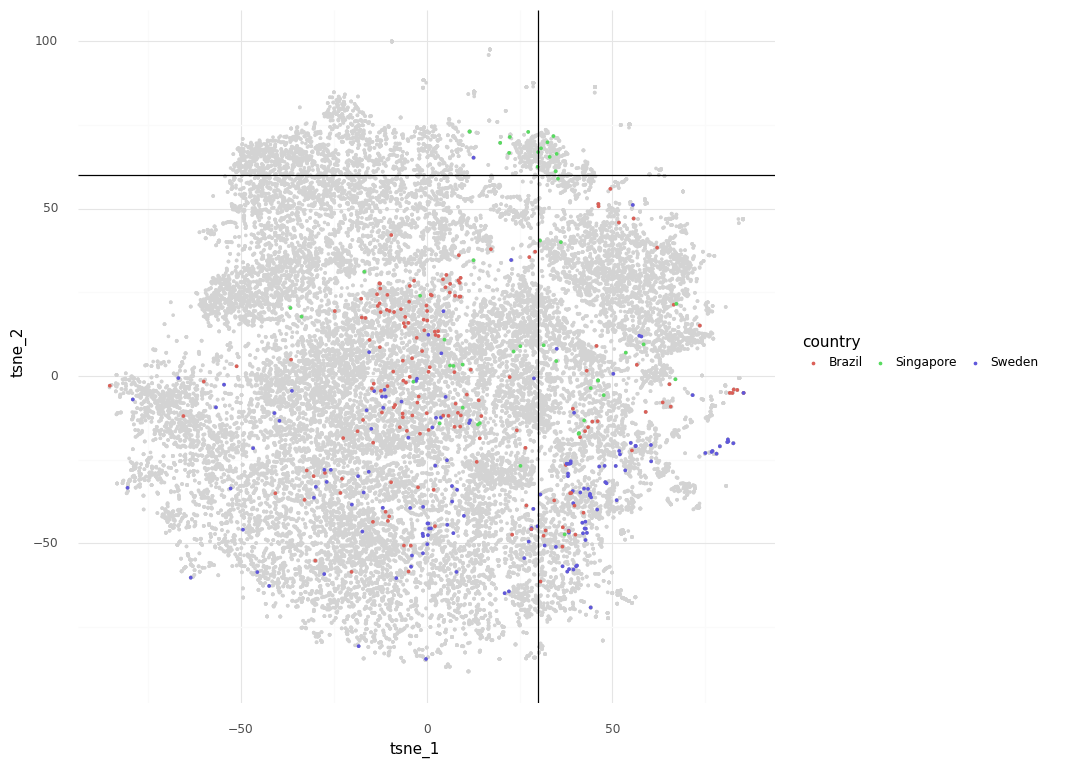

<ggplot: (-9223371909409320212)>

In [70]:
p.options.figure_size = 9, 9
(
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', label = 'country', color = 'country'), adata.obs)
    + p.geom_point(shape = '.', color = 'lightgrey')
    + p.geom_point(shape = '.', data = adata.obs.query('country in ["Sweden", "Brazil", "Singapore"]'))
    + p.geom_hline(yintercept = 60)
    + p.geom_vline(xintercept = 30)
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(ncol = 3))
)

In [71]:
adata.obs.query('tsne_1 > 30').query('tsne_2 > 60')['country'].value_counts()

United States    254
Philippines      213
Cuba              27
Spain             16
Singapore          7
Mexico             4
Japan              3
India              3
China              2
Haiti              1
Switzerland        1
Georgia            1
Canada             1
Egypt              1
Samoa              1
Ireland            1
Belgium            1
Name: country, dtype: int64